# Evaluation Project - 1

## Baseball Case Study
   
   ### Problem Statement:
    This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

    -- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

    -- Output: Number of predicted wins (W)

   

### STEP 1 : DATA PREPARATION

In [598]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV


In [599]:
train = pd.read_csv('baseball.csv')

In [600]:
train.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [601]:
train.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [602]:
train[train.duplicated()]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


                -------NO NULL VALUES / Duplicate rows-------
                
                ------- ALL Features are Continous Variables------

### STEP 2: EDA

#### *UNIVARIANTE ANALYSIS*

#### DISTRIBUTION PLOTS:
    To check the gaussian like structure of all continous features

<AxesSubplot:xlabel='W', ylabel='Density'>

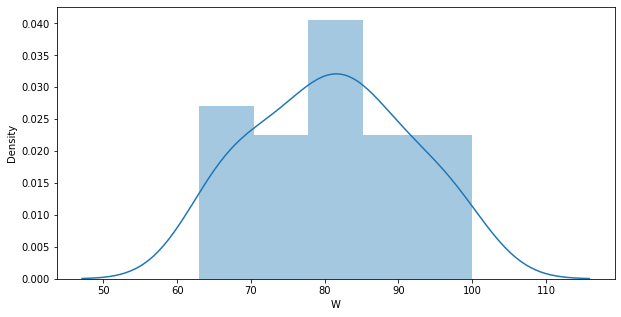

In [603]:
plt.figure(figsize=(10,5))
sb.distplot(train['W'])

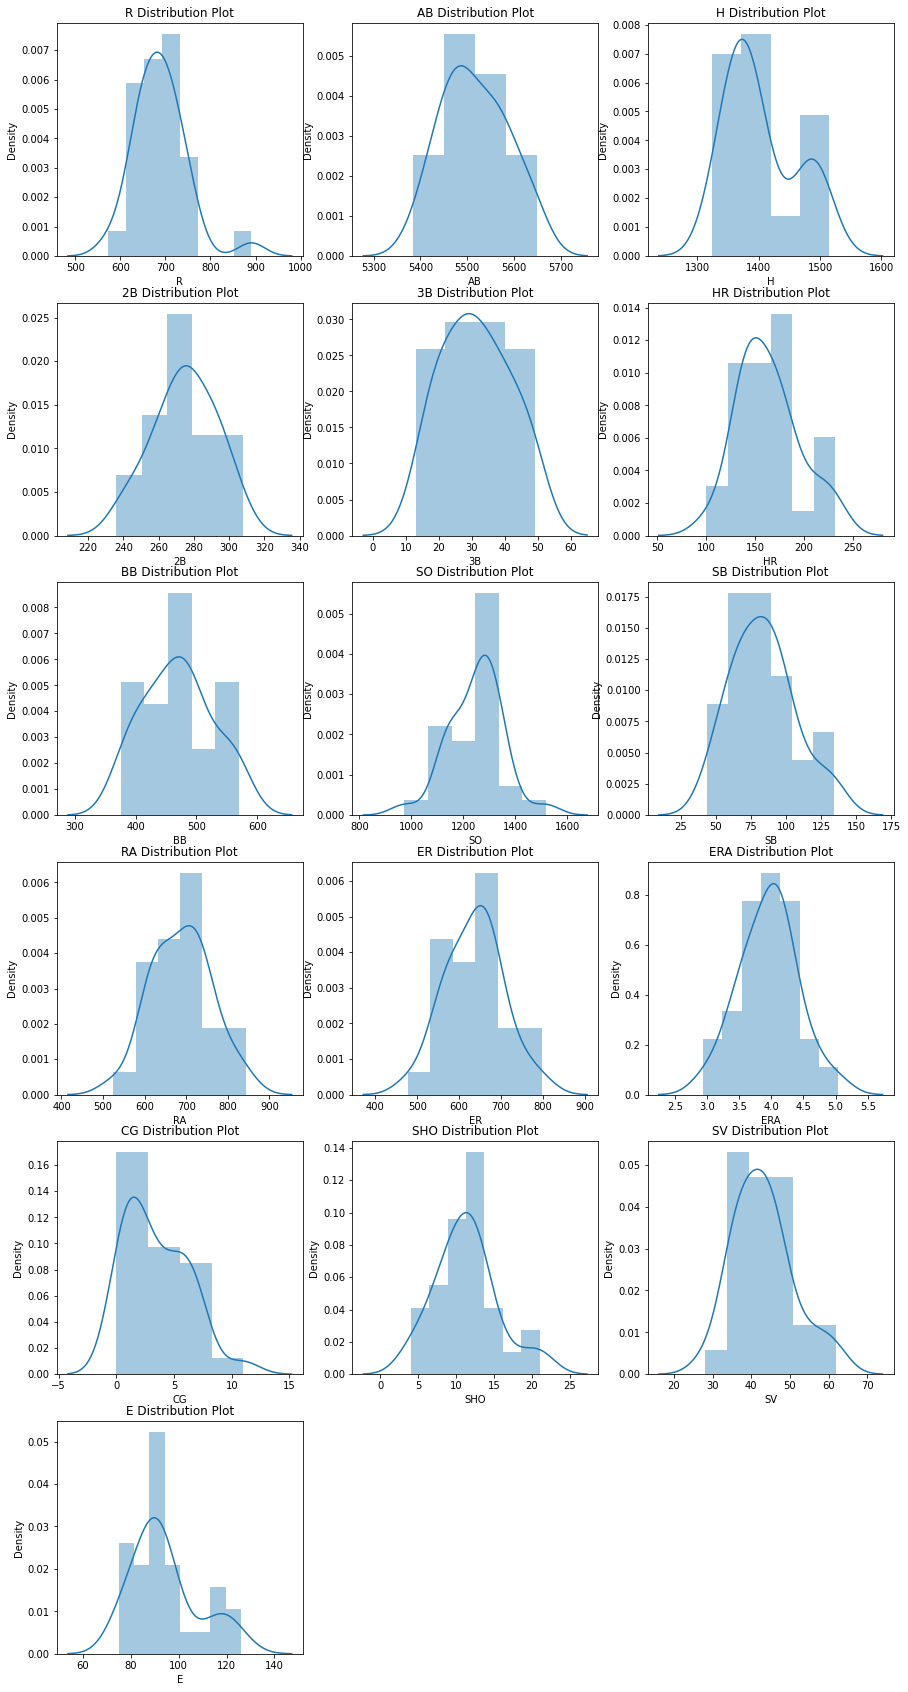

In [604]:
c = 1
plt.figure(figsize=(15,30))
for i in train.columns[1:]:
    
    plt.subplot(6,3,c)
    c = c+1
    sb.distplot(train[i])
    plt.title(i+' Distribution Plot')
    

#### OBSERVATIONS:
    - Most of the Features show normal distribution.
    - E/ R features show some skewness
    
    
##### BOXPLOTS : To see range of each feature and presence fo any extreme values.

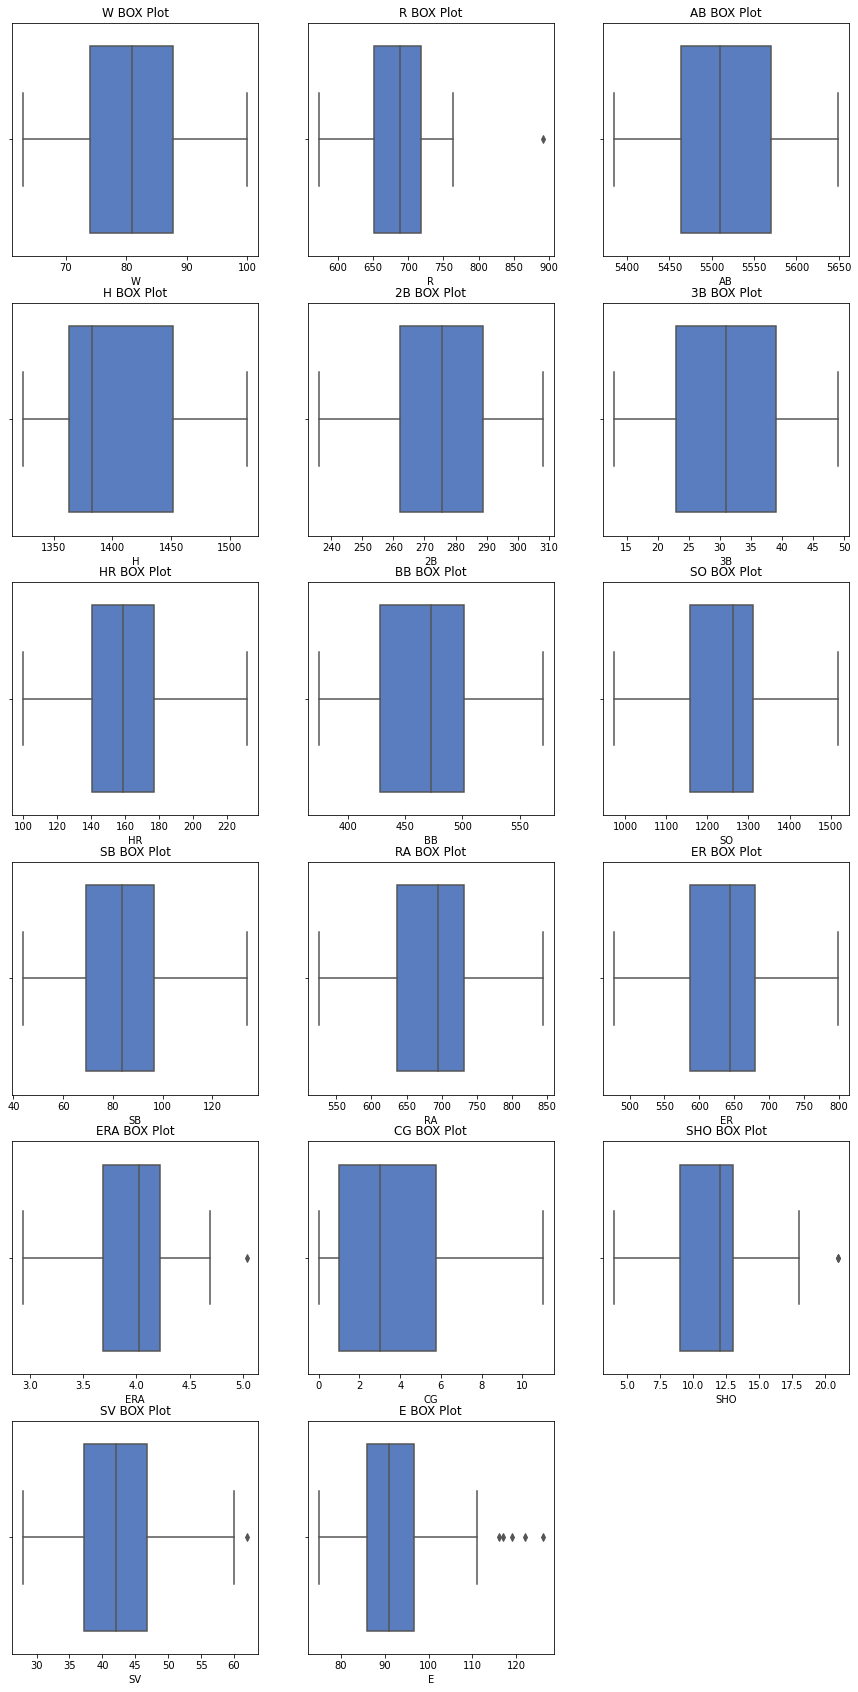

In [605]:
c = 1
plt.figure(figsize=(15,30))
for i in train.columns:
    
    plt.subplot(6,3,c)
    c = c+1
    sb.boxplot(train[i],palette='muted')
    plt.title(i+' BOX Plot')
    

#### OBSERVATIONS: 
        -- Some extreme values in E Features. SV/ ERA / SHO / R hasfew extreme values

#### BIVARIANTE ANALYSIS

<Figure size 1080x2160 with 0 Axes>

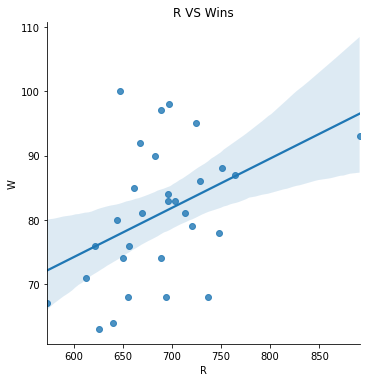

<Figure size 1080x2160 with 0 Axes>

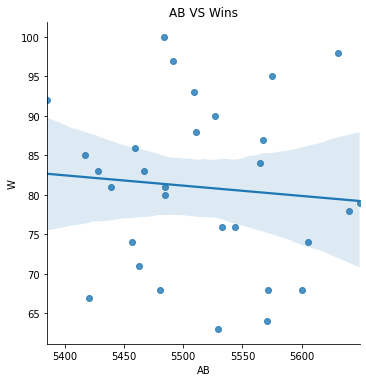

<Figure size 1080x2160 with 0 Axes>

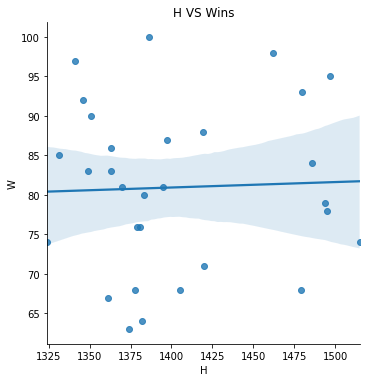

<Figure size 1080x2160 with 0 Axes>

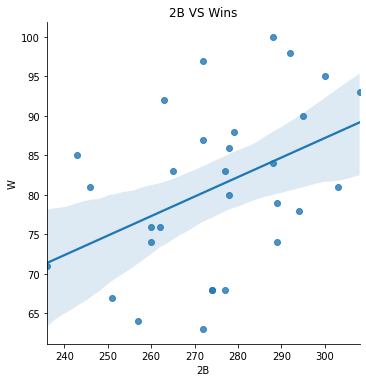

In [606]:

for i in train.columns[1:5]:
  
    plt.figure(figsize=(15,30))
    sb.lmplot(i,'W',train)
    plt.title(i+' VS Wins')
    

### OBSERVATIONS:
    1. HIGH VARIANCE / large Spread & Biasness of data noticed in above plots.
    2. H/AB Feature has values spread over all over, giving least influence on the Wins.
    3. Runs/ 2B has significant linear relation , but still high variance in data Points.
    


<Figure size 1080x2160 with 0 Axes>

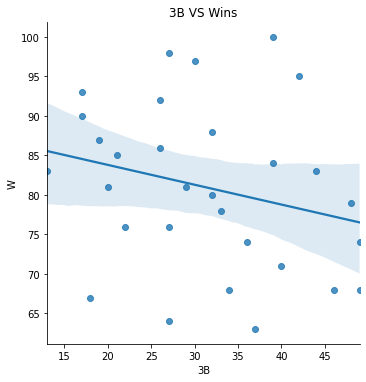

<Figure size 1080x2160 with 0 Axes>

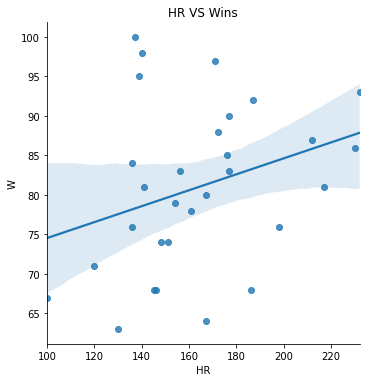

<Figure size 1080x2160 with 0 Axes>

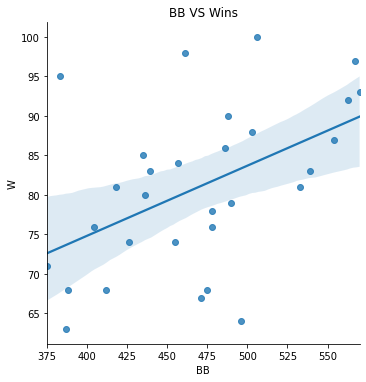

<Figure size 1080x2160 with 0 Axes>

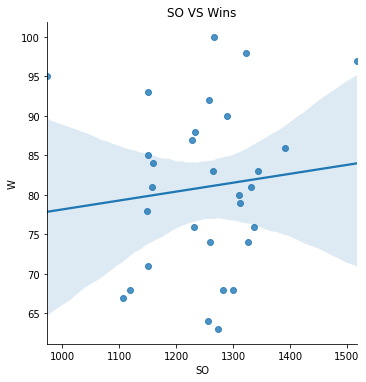

<Figure size 1080x2160 with 0 Axes>

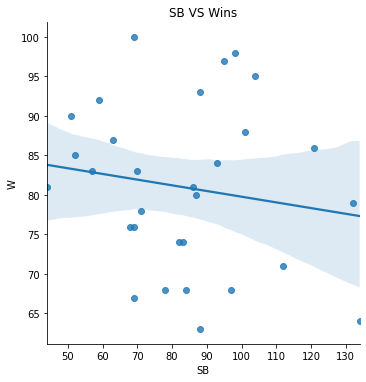

<Figure size 1080x2160 with 0 Axes>

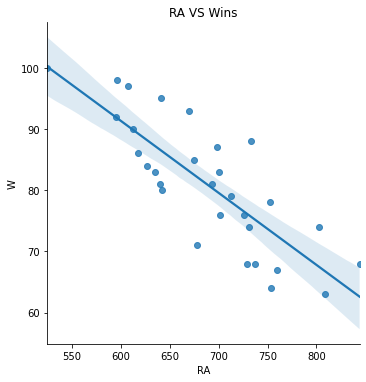

In [607]:

for i in train.columns[5:11]:
  
    plt.figure(figsize=(15,30))
    sb.lmplot(i,'W',train)
    plt.title(i+' VS Wins')
    

#### OBSERVATION:
        - Homerun is a good indicator for predicting wins for the team.
        - 3B has significantly -ve relation with wins.
        - BB has  significantly linear relationship in predicting wins.
        - Strikeouts has a very high variance of data points. less relationship showcase with wins.
        - SB/ Stolen bases has high Biassness in Data points.
        - RA ( Runs Allowed ) has strong negative relation ship with less variance / less biasss .
        - 

<Figure size 1080x2160 with 0 Axes>

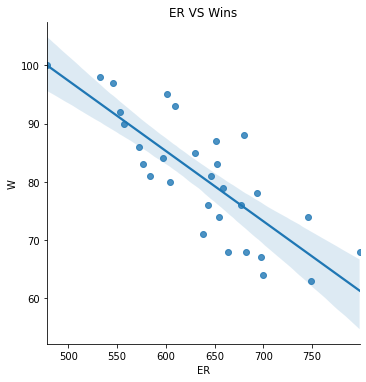

<Figure size 1080x2160 with 0 Axes>

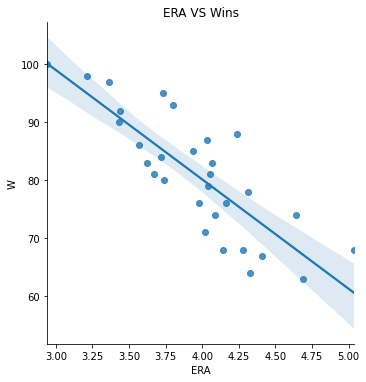

<Figure size 1080x2160 with 0 Axes>

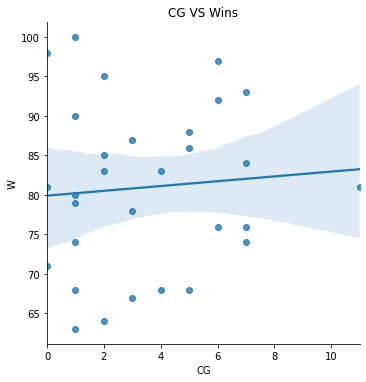

<Figure size 1080x2160 with 0 Axes>

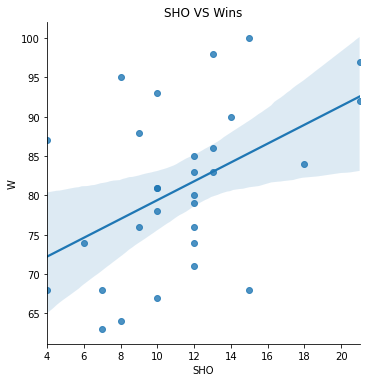

<Figure size 1080x2160 with 0 Axes>

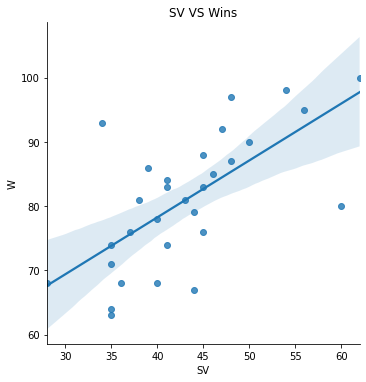

<Figure size 1080x2160 with 0 Axes>

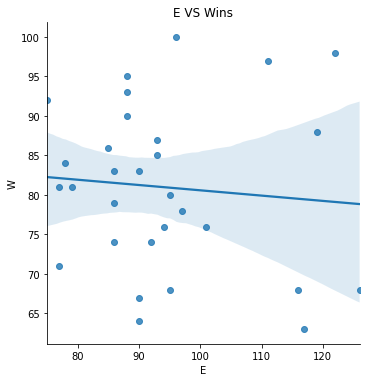

In [608]:

for i in train.columns[11:]:
  
    plt.figure(figsize=(15,30))
    sb.lmplot(i,'W',train)
    plt.title(i+' VS Wins')
    

#### OBSERVATIONS:
    -- ER & ERA / Earned Runs/ Earned Run Average Average has strong Negative correlatino with wins.
    --  CG Shows high variance data points , high bias influencing low influence on the Wins.
    -- Sv has good linear relation with Wins.
    -- Shutouts has linear relation and high variance.
    -- Error is Highly Biassed and Wide Spread having low influence on predicted Wins.

### Bivariante Analysis between Features

        

Text(0.5, 1.0, 'Earned Runs Vs Earned Runs Average')

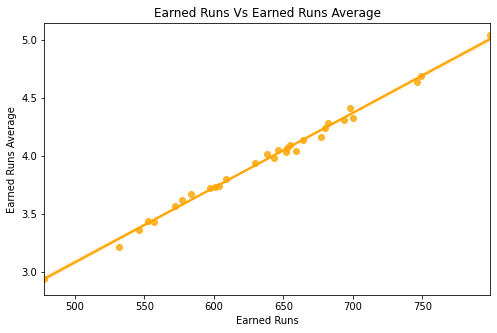

In [609]:
plt.figure(figsize=(8,5))

sb.regplot(train['ER'],train['ERA'],color='orange')
plt.xlabel('Earned Runs')
plt.ylabel('Earned Runs Average')
plt.title('Earned Runs Vs Earned Runs Average')

Text(0.5, 1.0, 'Earned Runs Vs Earned Runs Average')

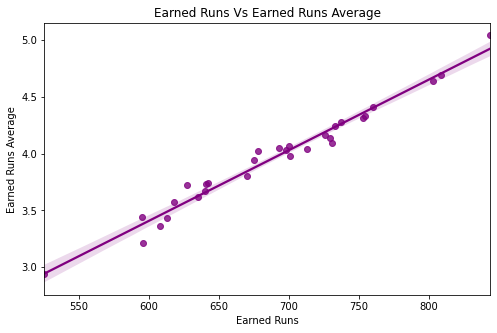

In [610]:
plt.figure(figsize=(8,5))
sb.regplot(train['RA'],train['ERA'],color='purple')
#sb.lineplot(train['RA'],train['ERA'],color='orange')
plt.xlabel('Earned Runs')
plt.ylabel('Earned Runs Average')
plt.title('Earned Runs Vs Earned Runs Average')

    ----- ER and ERa / Runs Allowes and Average Earned  RUNS might have realtion as these feature are related to each other, one is average of another. as the total runs increases ,average also increses-------

Text(0.5, 1.0, ' Runs Vs Home Runs')

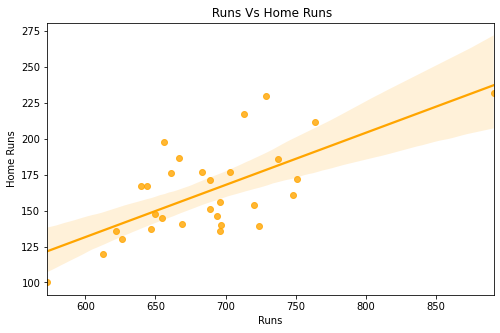

In [611]:
plt.figure(figsize=(8,5))
#sb.scatterplot(train['R'],train['HR'],alpha=.5,color='black')
sb.regplot(train['R'],train['HR'],color='orange')
plt.xlabel('Runs')
plt.ylabel('Home Runs')
plt.title(' Runs Vs Home Runs')

        -- Linear Relation between Homeruns and total runs made by a Team----

#### MULTIVARIANTE ANALYSIS

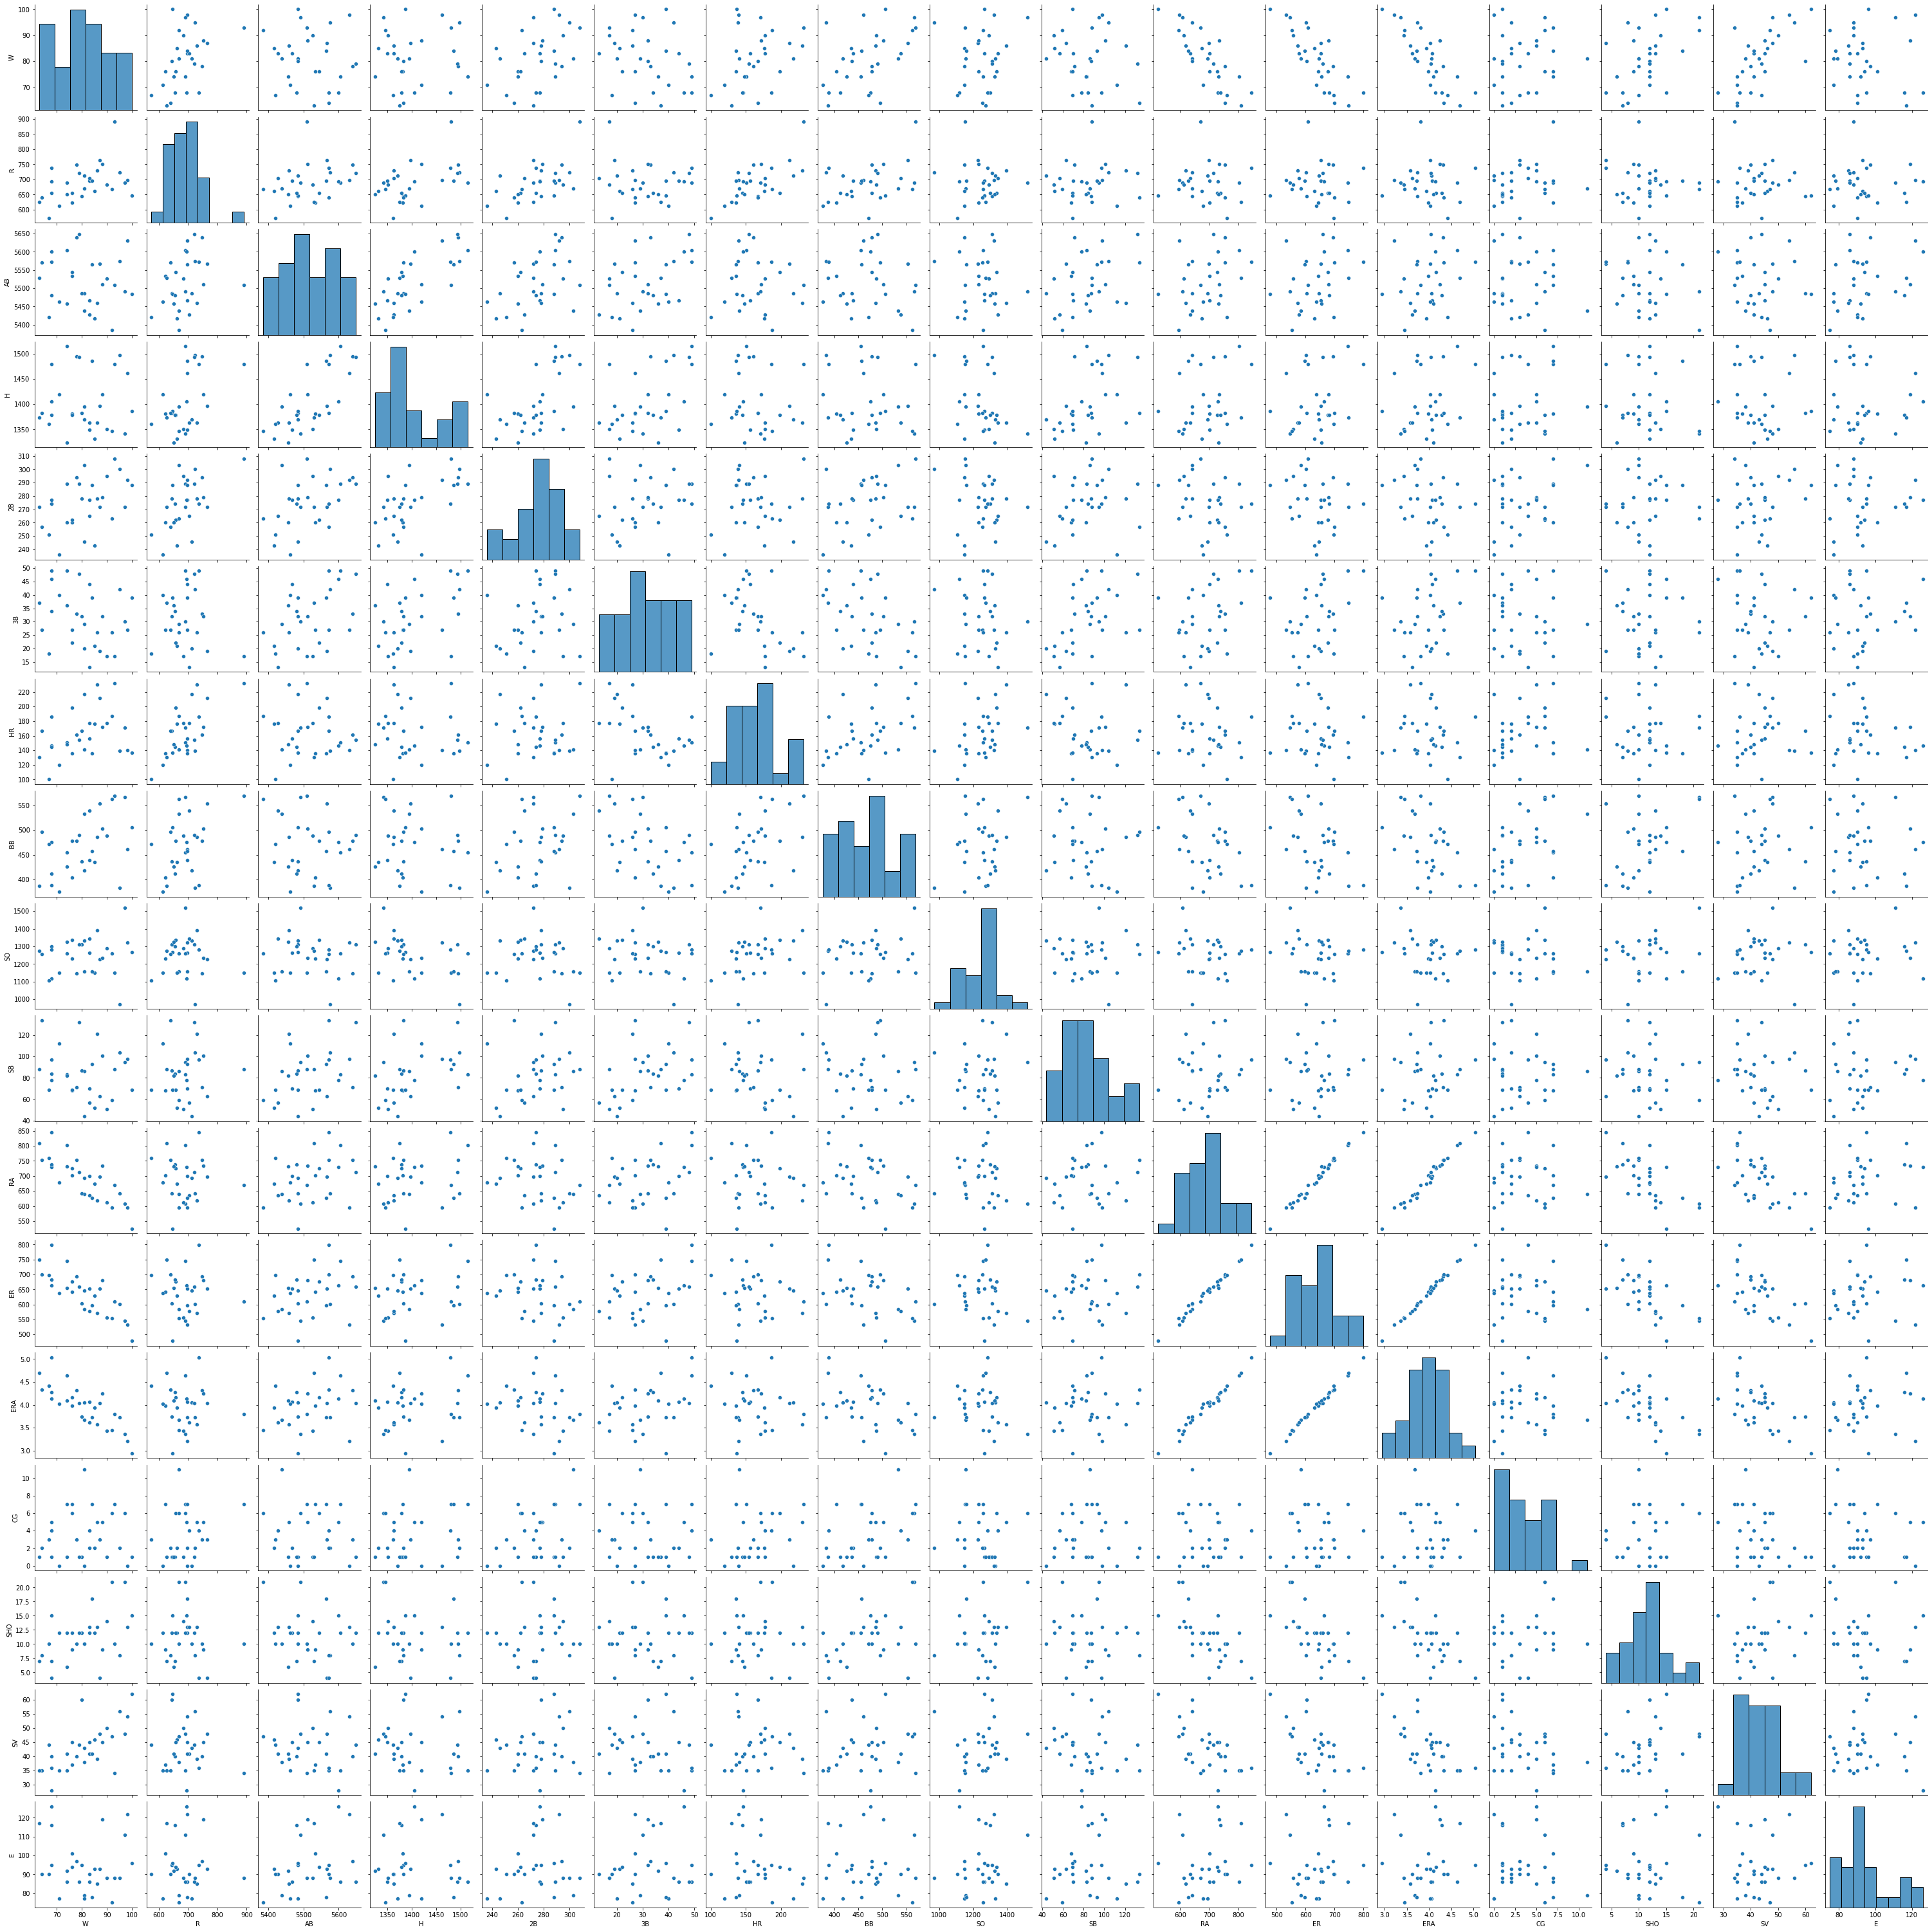

In [612]:
sb.pairplot(train)

<AxesSubplot:>

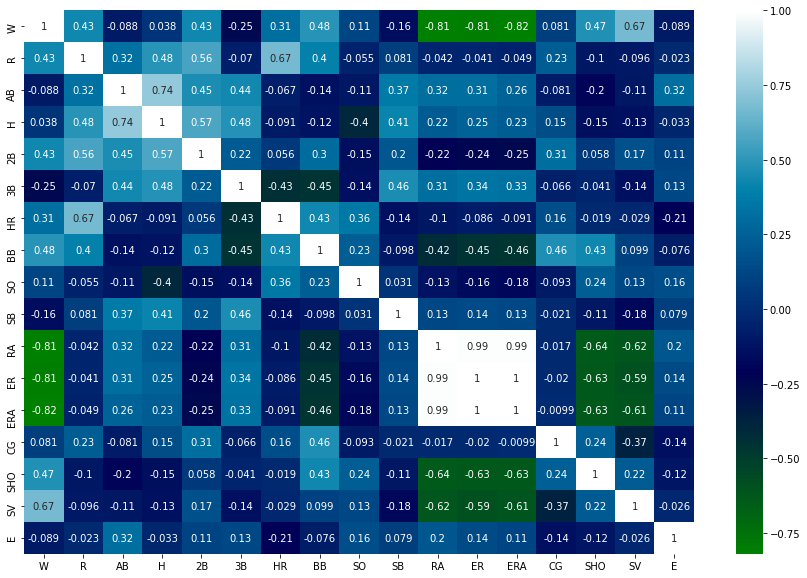

In [613]:
plt.figure(figsize=(15,10))
sb.heatmap(train.corr(),annot=True,cmap='ocean')

#### OBSERVATIONS
    -- AS we saw in bivariante analysis between featrues,( Runs allowed and Earned Runs Average) and (Earned Runs and ERA) have very high correlation 0.99.
    -- HigH negative corelation between Saved and RA/ER/ERA.
    --  HigH negative corelation between SHutouts and RA/ER/ERA.
    - Negative  moderate correlation between BB  and ER/ERA/RA.
    -- PRedicted Wins, THe Target Variable has Strong -ve/+ve correlation with ERA/RA/RA , SV, SHO, BB, R.
    -- Hig Multicollinearity observed.

<AxesSubplot:>

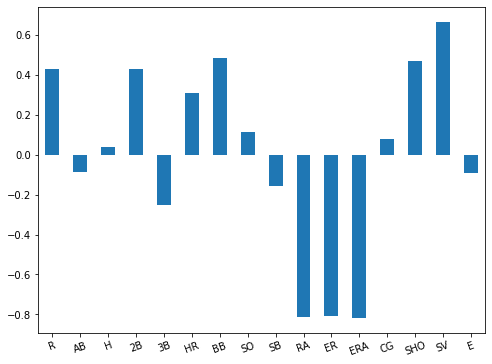

In [614]:
plt.figure(figsize=(8,6))
corr=train.drop("W",axis=1).corrwith(train["W"])
corr.plot(kind="bar",rot=20)

#### OBSERVATION
    -- AS ER and ERA are highly dependent/ Similar features on each other we can remove one of these features.

### STEP3 : DATA CLEANING:
    - OUTLIER TREATMET WITH ZSCORE METHOD : any rows cannot  cannot be outliers as each row represents a team of baseball.
    - Scaling the Data 
    - Skewness treatment

In [615]:
train1 = train

In [616]:
from scipy.stats import zscore

In [617]:
zscores = np.abs(zscore(train1))

In [618]:
np.where(zscores>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [619]:
train1.shape

(30, 17)

In [620]:
train1 = train1[(zscores<3).all(axis=1)]

In [621]:
train1.shape

(29, 17)

### only 2 row is looked as outlier we can remove it,

### SKEWNESS CHeck

In [622]:
train1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

 #### OBSERVATIONS:
     - AS only 2 features have skewness.  No need to tranfrom all the features, applying np.sqrt/ cbrt  to featuree having skewness.


In [623]:
train1['H'] = np.sqrt(train1['H'])


In [624]:
train1['SV'] = np.sqrt(train1['SV'])
train1['E'] = np.sqrt(train1['E'])


In [625]:
train1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.761274
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.370280
E      0.714966
dtype: float64

### STEP 4 : Feature Selection with PCA 

In [626]:
from sklearn.decomposition import PCA

In [627]:
y1 = train1['W']
y = train['W']

In [628]:
train.drop('W',axis=1,inplace=True)
train1.drop('W',axis=1,inplace=True)

In [629]:
pca = PCA()

In [630]:
pca.fit(train1,y)

PCA()

<BarContainer object of 16 artists>

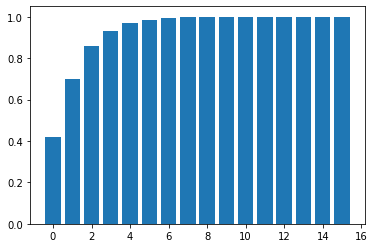

In [631]:
plt.bar(range(0,16),np.cumsum(pca.explained_variance_ratio_))

In [632]:
pca.explained_variance_ratio_

array([4.18923448e-01, 2.80929900e-01, 1.57664144e-01, 7.17836067e-02,
       4.20551075e-02, 1.40942795e-02, 8.97300073e-03, 3.11002354e-03,
       1.50557440e-03, 6.31921838e-04, 2.08447611e-04, 1.05509544e-04,
       1.01146507e-05, 3.26741796e-06, 1.65045596e-06, 4.16194070e-09])

### CHoosing 6 components( enough to get  + 95% info) and Feature Reenignieering

In [633]:
pca = PCA(n_components=6)

In [634]:
features = pca.fit_transform(train1,y1)

In [635]:
pca_transformed = pd.DataFrame(features,columns=range(0,6))

<AxesSubplot:>

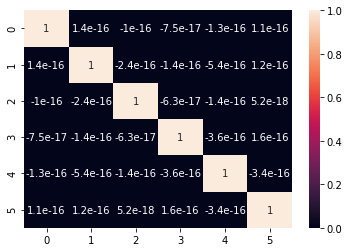

In [636]:
sb.heatmap(pca_transformed.corr(),annot=True)

In [637]:
pca_transformed.shape

(29, 6)

#### STEP5 : MODELLING THE DATA

In [638]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [639]:
randomstate = 0
max_score = 0
lr = LinearRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(pca_transformed,y1,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of LR MODEL : ',max_score*100)


Random State= 195  and R2 Score of LR MODEL :  89.85230838477662


In [640]:
 x_train,x_test,y_train,y_test = train_test_split(pca_transformed,y1,test_size=.30,random_state=randomstate)

In [641]:


models =[LinearRegression(),Ridge(),Lasso(),ElasticNet(),SVR(),KNeighborsRegressor(n_neighbors=5),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),
        XGBRegressor()]

In [642]:
for model in models:
    model.fit(x_train,y_train)
    pred_model = model.predict(x_test)
    print('MODEL:--------- ',model,'----------------')
    print('R2 Score of model : ',r2_score(y_test,pred_model))
   
    print('Training Score/ CV Score  of Model: '
          ,np.mean(cross_val_score(model,pca_transformed,y1,cv=5,scoring='r2')))
   
    print('Mean Sqaured Error',mean_squared_error(y_test,pred_model))
    
    print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_model)))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_model))
    print('')

    
    

MODEL:---------  LinearRegression() ----------------
R2 Score of model :  0.8985230838477662
Training Score/ CV Score  of Model:  0.09283675588402078
Mean Sqaured Error 15.695096364878822
Root Mean  Sqaured Error 3.9617037199769016
Mean Absolute Error 3.201979555695453

MODEL:---------  Ridge() ----------------
R2 Score of model :  0.8985264235065265
Training Score/ CV Score  of Model:  0.09285432234516613
Mean Sqaured Error 15.694579830990582
Root Mean  Sqaured Error 3.961638528562466
Mean Absolute Error 3.2018986088923773

MODEL:---------  Lasso() ----------------
R2 Score of model :  0.9009253649716537
Training Score/ CV Score  of Model:  0.09973024882429533
Mean Sqaured Error 15.323543551050896
Root Mean  Sqaured Error 3.9145297994843387
Mean Absolute Error 3.155902352564163

MODEL:---------  ElasticNet() ----------------
R2 Score of model :  0.8997636565303966
Training Score/ CV Score  of Model:  0.09650833483692897
Mean Sqaured Error 15.503221123298662
Root Mean  Sqaured Error 3.

### OBSERVATION,
    -> AS our dataset is highly Variance data, we train simple models rather than complex models to reduce OVERfitting.
    -> regression models, lasso, elastic net works perfectly with  least mean _square Error metrics.
    -> LAsso has highest performance

### STEP 6 : HYPER PARAMETER TUNING

            1. CHOSEN MODEL: LASSO  ()
            2. ENsemble model : Gradient Bossting Model

#### 6.1 LASSO MODELLING

In [643]:
lasso= Lasso()
params = {
    'alpha': [.5,1,2,5,10,20,25,50],
    'normalize': [True,False],
    'max_iter': [50,30,70,100,300,500,400,600],
    'fit_intercept':[True,False]
}

In [644]:
grid = GridSearchCV(lasso,params,cv=5,scoring='r2')

In [645]:
grid.fit(pca_transformed,y1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.5, 1, 2, 5, 10, 20, 25, 50],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 30, 70, 100, 300, 500, 400, 600],
                         'normalize': [True, False]},
             scoring='r2')

In [646]:
grid.best_estimator_

Lasso(alpha=25, max_iter=50)

In [647]:
    lasso = Lasso(alpha=25, max_iter=50)

    lasso.fit(x_train,y_train)
    pred_en = lasso.predict(x_test)
    print('--------- LASSO MODEL ----------------')
    print('R2 Score of model : ',r2_score(y_test,pred_en))
   # r2_scores.append(r2_score(y_test,pred_en))
    print('Training Score of Model: '
          ,np.mean(cross_val_score(lasso,pca_transformed,y1,cv=5,scoring='r2')))
    #cv_scores.append(np.mean(cross_val_score(elasticNet,pca_transformed,y1,cv=5,scoring='r2')))
    print('Mean Sqaured Error',mean_squared_error(y_test,pred_en))
    #rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_en)))
    print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_en)))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_en))
    print('')


--------- LASSO MODEL ----------------
R2 Score of model :  0.9210979752348913
Training Score of Model:  0.17270677842411625
Mean Sqaured Error 12.203513163670147
Root Mean  Sqaured Error 3.4933527110313594
Mean Absolute Error 2.6039742573826805



Text(0.5, 1.0, 'Error Distribution Plot')

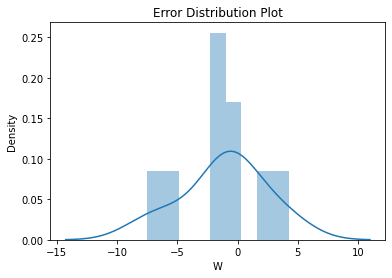

In [648]:
plt.figure()
sb.distplot(pred_en-y_test)
plt.title('Error Distribution Plot')

Text(0, 0.5, 'Predicted OBs')

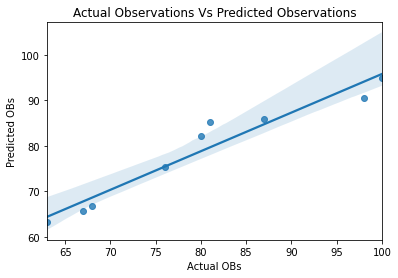

In [649]:
plt.figure()
sb.regplot(y_test,pred_en)
plt.title('Actual Observations Vs Predicted Observations')
plt.xlabel('Actual OBs')
plt.ylabel('Predicted OBs')

In [650]:
y_test.values,pred_en

(array([ 81,  67,  63,  87,  98, 100,  76,  68,  80], dtype=int64),
 array([85.23174042, 65.68143702, 63.19052541, 85.86068922, 90.49357704,
        94.87740204, 75.3774485 , 66.80496977, 82.10902608]))

### AS Error has a Normal distribution, Linear relation with Actual Vs Predicted, out model is working fine without overfitting.

#### 6.2 Gradient Boosting Regressor

In [651]:
params_gb = {
    'loss': ['ls','lad','huber','quantile'], 
    'learning_rate': [0.1,1,.5,.01],
    'n_estimators': [400,200,100,150,50],
    'criterion': ['mae','mse','friedman_mse']
}
gb = GradientBoostingRegressor()

In [652]:
grid_gb = GridSearchCV(gb,params_gb,cv=5,scoring='r2')

In [653]:
grid_gb.fit(pca_transformed,y1)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mae', 'mse', 'friedman_mse'],
                         'learning_rate': [0.1, 1, 0.5, 0.01],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [400, 200, 100, 150, 50]},
             scoring='r2')

In [654]:
 grid_gb.best_estimator_ 

GradientBoostingRegressor(loss='quantile', n_estimators=400)

--------- Gradient MODEL ----------------
R2 Score of model :  0.010958616921930786
Training Score of Model:  0.17270677842411625
Mean Sqaured Error 152.9717339160747
Root Mean  Sqaured Error 12.368174235354008
Mean Absolute Error 10.950242851255839



Text(0, 0.5, 'Predicted OBs')

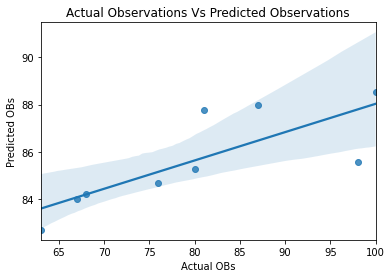

In [659]:
    gb =  grid_gb.best_estimator_

    gb.fit(x_train,y_train)
    pred_en = gb.predict(x_test)
    print('--------- Gradient MODEL ----------------')
    print('R2 Score of model : ',r2_score(y_test,pred_en))
   # r2_scores.append(r2_score(y_test,pred_en))
    print('Training Score of Model: '
          ,np.mean(cross_val_score(lasso,pca_transformed,y1,cv=5,scoring='r2')))
    #cv_scores.append(np.mean(cross_val_score(elasticNet,pca_transformed,y1,cv=5,scoring='r2')))
    print('Mean Sqaured Error',mean_squared_error(y_test,pred_en))
    #rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_en)))
    print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_en)))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_en))
    print('')
    
    plt.figure()
    sb.regplot(y_test,pred_en)
    plt.title('Actual Observations Vs Predicted Observations')
    plt.xlabel('Actual OBs')
    plt.ylabel('Predicted OBs')


#### OBSERVATIONS:
         Boosting models are undergoing underfitting and not performing properly, 
         Choosing Simpler model , LASSO as FINAL MODEL with RMSe 2.9 and for boosting algo 10
    

### EVALUATIING FINAL MODEL : LASSO


--------- LASSO MODEL ----------------
R2 Score of model :  0.9210979752348913
Training Score of Model:  0.17270677842411625
Mean Sqaured Error 12.203513163670147
Root Mean  Sqaured Error 3.4933527110313594
Mean Absolute Error 2.6039742573826805


Text(0, 0.5, 'Predicted OBs')

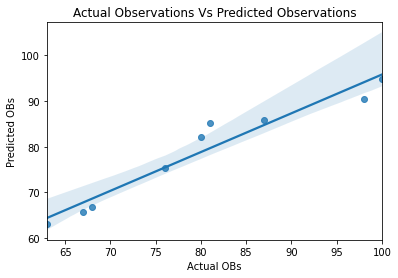

In [663]:
    lasso = Lasso(alpha=25, max_iter=50)

    lasso.fit(x_train,y_train)
    pred_en = lasso.predict(x_test)
    print('--------- LASSO MODEL ----------------')
    print('R2 Score of model : ',r2_score(y_test,pred_en))
   # r2_scores.append(r2_score(y_test,pred_en))
    print('Training Score of Model: '
          ,np.mean(cross_val_score(lasso,pca_transformed,y1,cv=5,scoring='r2')))
    #cv_scores.append(np.mean(cross_val_score(elasticNet,pca_transformed,y1,cv=5,scoring='r2')))
    print('Mean Sqaured Error',mean_squared_error(y_test,pred_en))
    #rmse_scores.append(np.sqrt(mean_squared_error(y_test,pred_en)))
    print('Root Mean  Sqaured Error',np.sqrt(mean_squared_error(y_test,pred_en)))
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_en))
    plt.figure()
    sb.regplot(y_test,pred_en)
    plt.title('Actual Observations Vs Predicted Observations')
    plt.xlabel('Actual OBs')
    plt.ylabel('Predicted OBs')


        --------
        Training Score is very low, predictions are with Hgih variance, under going a little overfitting BUT Working Best among the other Models
        --------

### STEP 7 : SAVE THE MODEL

In [660]:
import joblib 


In [661]:
joblib.dump(lasso,'baseball_lasso.pk')

['baseball_lasso.pk']

In [662]:
joblib.load('baseball_lasso.pk')

Lasso(alpha=25, max_iter=50)

#### CONCLUSION:
        Model for Prediction Of WINs for baseball teams are done with LASSO with R2 Score of .921  
        Feature Engineering with PCA with 6 components as upto 6 features were able to give more than 95% information about the Data.